**Imoorts**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
#from keras.utils import to_categorical

print(tf.__version__)    

import os
from tensorflow import keras
from keras import layers,optimizers,datasets,Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.models import Model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

from numpy import array
from numpy import argmax,ndarray
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils


2.8.0


**Load the data**

In [29]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [30]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


**Data Visualization**

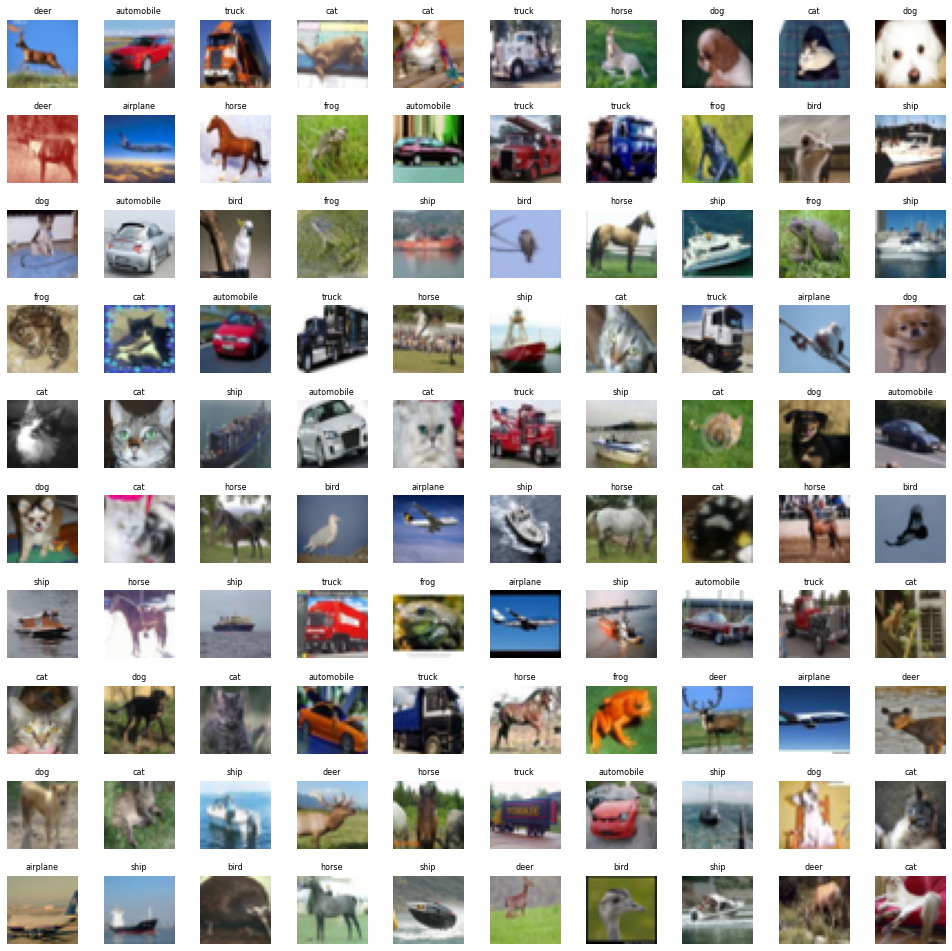

In [31]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

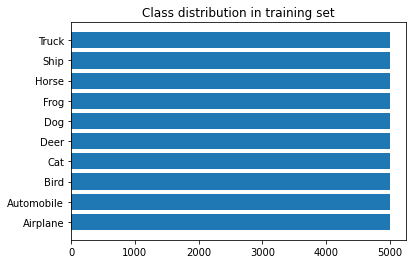

In [32]:
 classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

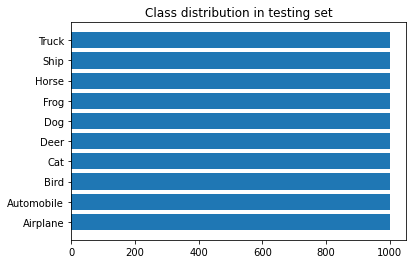

In [33]:
classes, counts= np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

**Data Preprocessing**

In [34]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = np_utils.to_categorical(y_train, 10)
y_cat_test = np_utils.to_categorical(y_test, 10)

In [35]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

**Model Building**

In [36]:

# Build the model using the functional API
# input layer
i = Input(shape=X_train[0].shape)

x = Conv2D(64, (5, 5), activation='relu', padding='same')(i)
x = MaxPooling2D(pool_size=(3, 3),strides=(2,2))(x)
x = tf.keras.layers.BatchNormalization()(x)


x = Conv2D(64, (5, 5), activation='relu', padding='same')(i)
x = MaxPooling2D(pool_size=(3, 3),strides=(2,2))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = Flatten()(x)

x = Dense(1228, activation='relu')(x)
x = Dense(384, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(192, activation='relu')(x)

x = Dense(10, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 15, 15, 64)       256       
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_4 (Dense)             (None, 1228)              1768

In [37]:
METRICS = ['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 15, 15, 64)       256       
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_4 (Dense)             (None, 1228)              1768

**Early Stopping**

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

**Data Augmentations**

In [40]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [42]:
r = model.fit(train_generator, epochs=80,steps_per_epoch=steps_per_epoch,validation_data=(X_test, y_cat_test),)#callbacks=[early_stop],batch_size=batch_size,)

Epoch 1/80
1562/1562 [==============================] - 31s 20ms/step - loss: 1.2368 - accuracy: 0.5661 - precision: 0.7348 - recall: 0.3956 - val_loss: 1.1720 - val_accuracy: 0.5823 - val_precision: 0.7648 - val_recall: 0.3986
Epoch 2/80
1562/1562 [==============================] - 31s 20ms/step - loss: 1.1742 - accuracy: 0.5924 - precision: 0.7490 - recall: 0.4289 - val_loss: 1.0581 - val_accuracy: 0.6298 - val_precision: 0.7870 - val_recall: 0.4836
Epoch 3/80
1562/1562 [==============================] - 30s 19ms/step - loss: 1.1173 - accuracy: 0.6109 - precision: 0.7598 - recall: 0.4632 - val_loss: 1.2316 - val_accuracy: 0.5852 - val_precision: 0.7155 - val_recall: 0.4883
Epoch 4/80
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0804 - accuracy: 0.6279 - precision: 0.7686 - recall: 0.4815 - val_loss: 1.0436 - val_accuracy: 0.6444 - val_precision: 0.8065 - val_recall: 0.4855
Epoch 5/80
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0420 - a

**Model Evaluation**

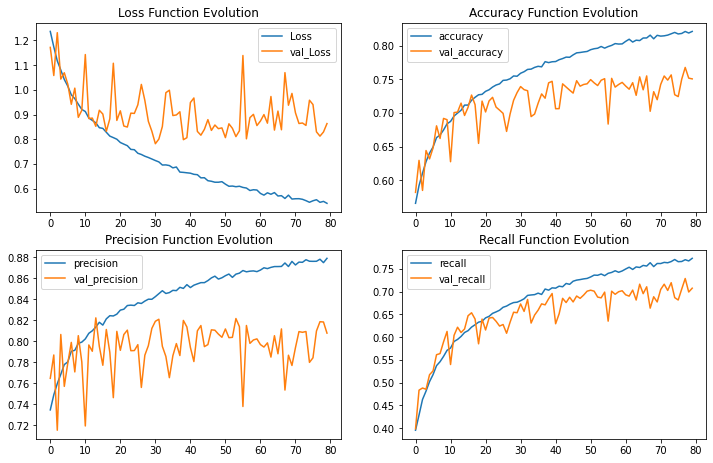

In [43]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [44]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.8631 - accuracy: 0.7508 - precision: 0.8078 - recall: 0.7076
Test Accuracy : 75.08%


In [45]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

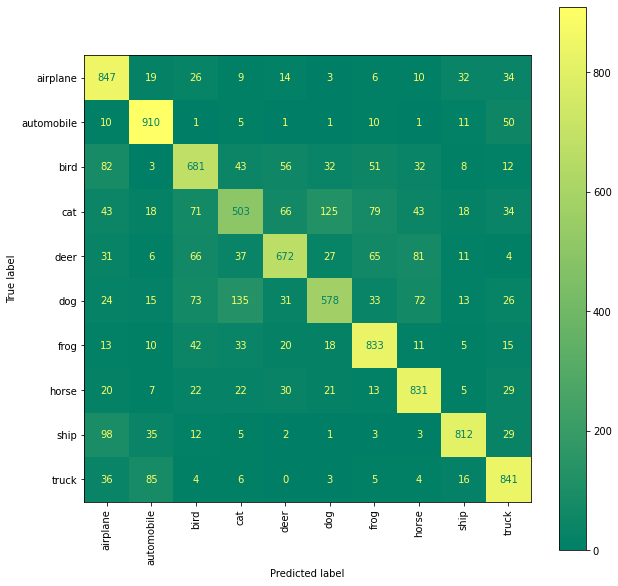

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1000
           1       0.82      0.91      0.86      1000
           2       0.68      0.68      0.68      1000
           3       0.63      0.50      0.56      1000
           4       0.75      0.67      0.71      1000
           5       0.71      0.58      0.64      1000
           6       0.76      0.83      0.79      1000
           7       0.76      0.83      0.80      1000
           8       0.87      0.81      0.84      1000
           9       0.78      0.84      0.81      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



**Test on one image**

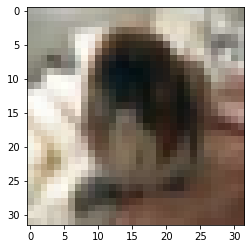

In [48]:
my_image = X_test[200]
plt.imshow(my_image)

In [49]:
# that's a Deer
y_test[200]

array([5], dtype=uint8)

In [50]:
# correctly predicted as a Deer
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

3

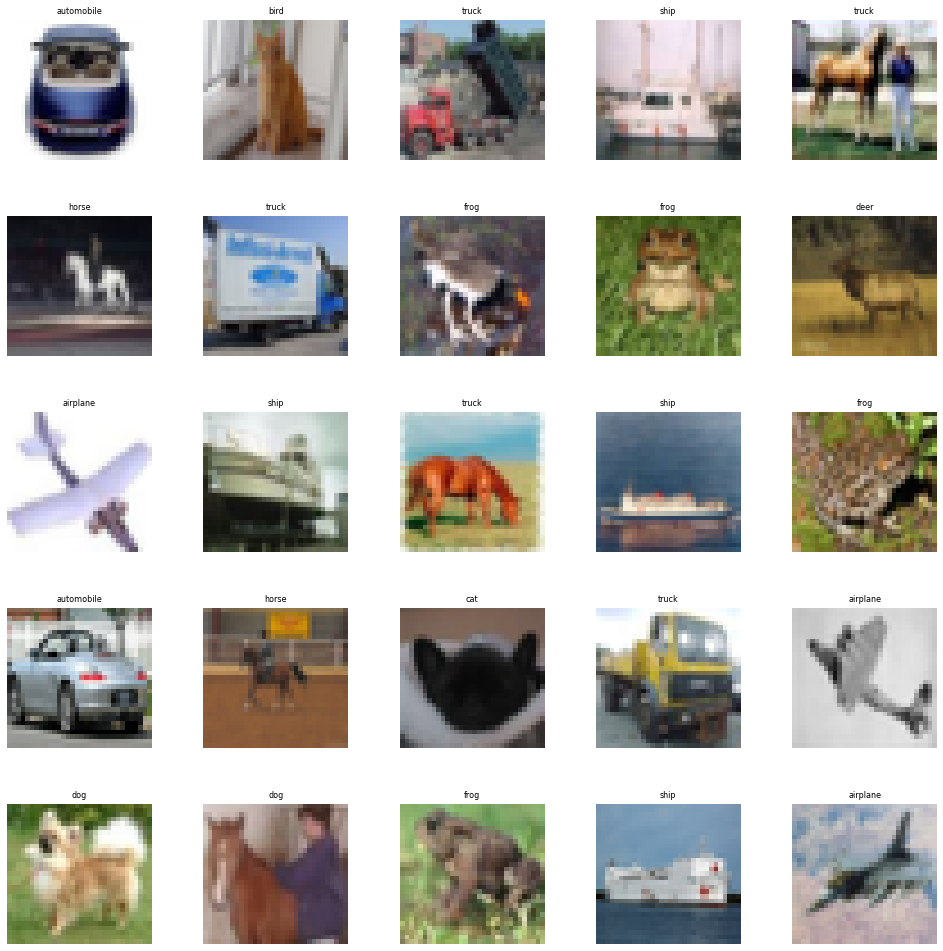

In [51]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [52]:
predictions = model.predict(X_test)

In [53]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

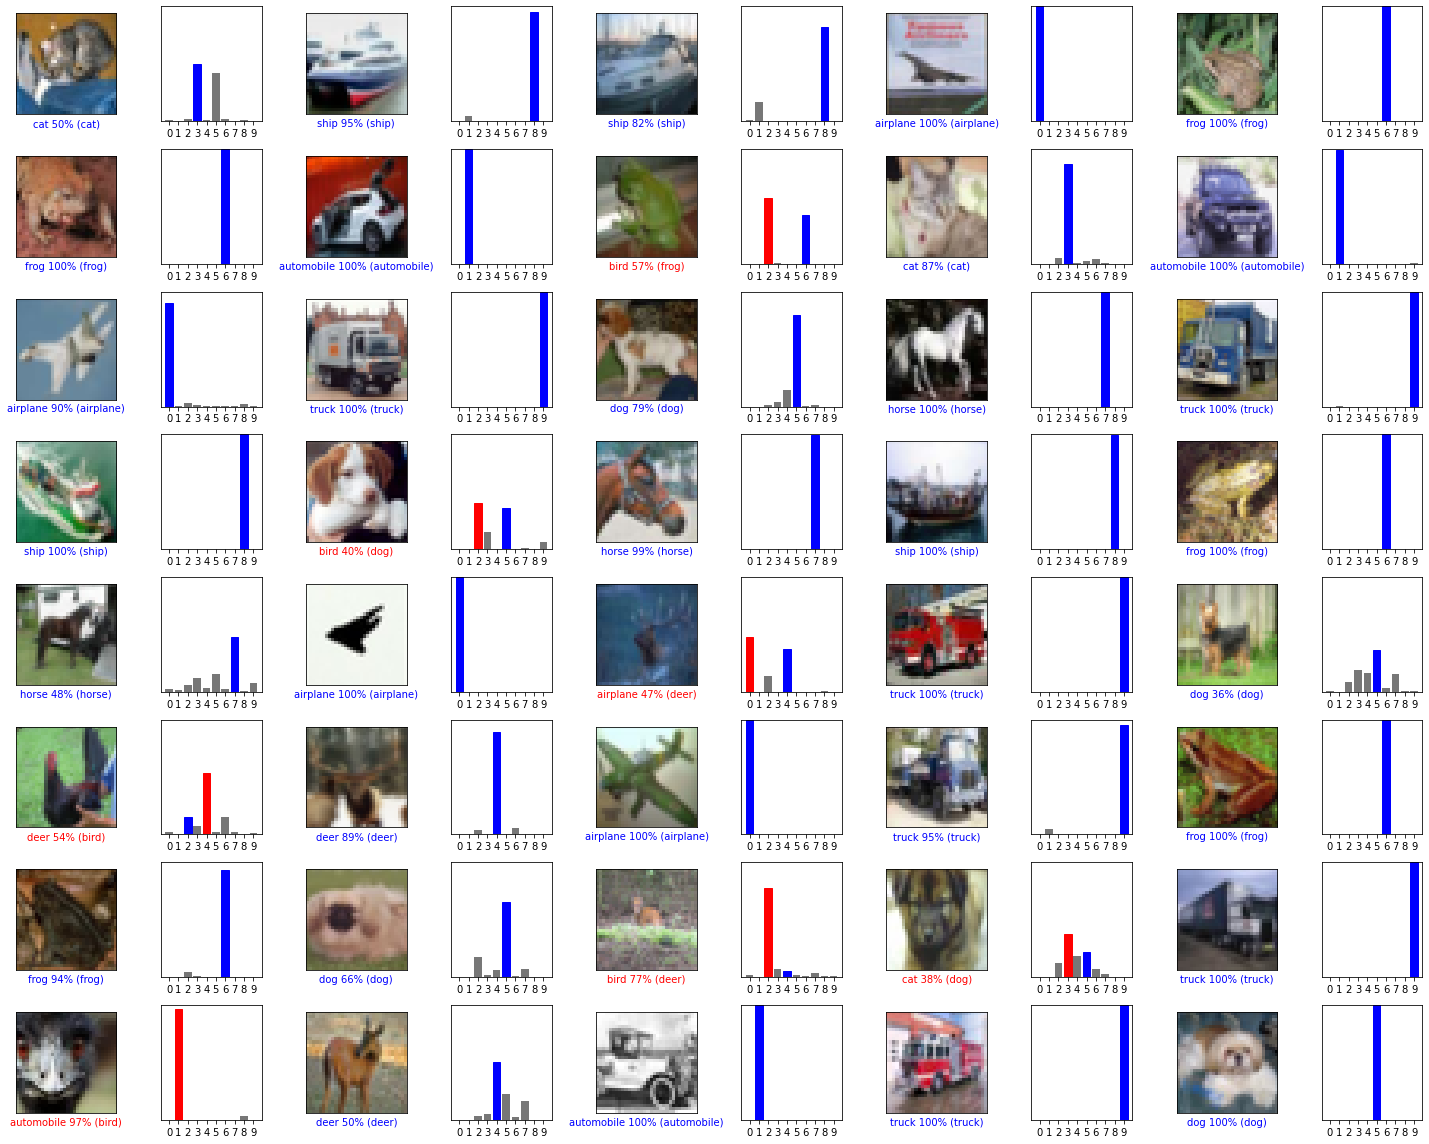

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()